In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import matplotlib as mpl

# mpl.rc('font', family='serif', serif='cmr10')
# plt.rcParams['axes.unicode_minus'] = False

# # Enable LaTeX rendering
# plt.rcParams['text.usetex'] = True
# plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath, amssymb} \usepackage{newtxtext, newtxmath}'

# # Ajustar el tamaño de fuente globalmente
# plt.rcParams.update({'font.size': 14})

In [1]:
from matplotlib import font_manager

font_path = 'Gulliver.otf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'Gulliver'
plt.rcParams['font.sans-serif'] = prop.get_name()
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.size": 10,  # Tamanho de fonte recomendado para artigos científicos (8-12 pt)
    "axes.labelsize": 10,  # Tamanho dos rótulos dos eixos
    "axes.titlesize": 10,  # Tamanho do título
    "xtick.labelsize": 10,  # Tamanho dos ticks do eixo X
    "ytick.labelsize": 10,  # Tamanho dos ticks do eixo Y
    "legend.fontsize": 10,  # Tamanho da legenda
})

NameError: name 'plt' is not defined

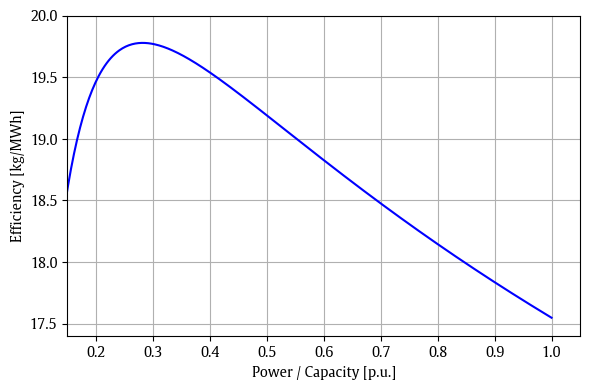

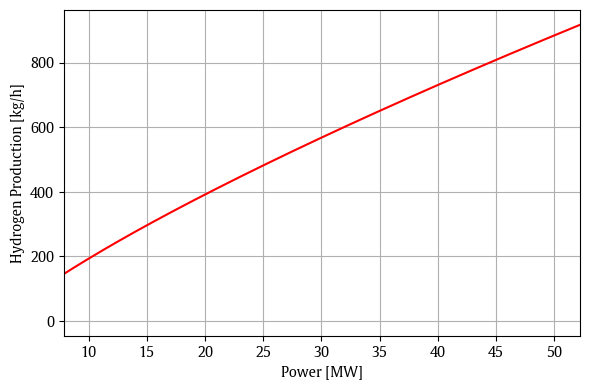

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#mpl.rc('font', family='serif', serif='cmr10', size=10)
#plt.rcParams['axes.unicode_minus'] = False

# Constants
a1, a2, a3, a4 = 1.5184, 1.5421E-03, 9.523E-05, 9.84E-08  # Reversible voltage coefficients
r1, r2 = 4.45153E-05, 6.88874E-09  # Ohmic resistance coefficients
d1, d2 = -3.12996E-06, 4.47137E-07  # Pressure dependency coefficients
s, t1, t2, t3 = 0.33824, -0.01539, 2.00181, 15.24178  # Activation overpotential parameters
f11, f12, f21, f22 = 478645.74, -2953.15, 1.0396, -0.00104  # Faraday efficiency parameters
F_const = 96485.3321  # Faraday constant in C/mol
M_H2 = 2.0159  # Molar mass of hydrogen (kg/kmol)
HHV = 39.41  # Higher Heating Value of Hydrogen (MWh/kg)
T_cell = 90  # Cell temperature in Celsius
p_cell = 30  # Cell pressure in bar
A_cell = 0.2  # Electrode area (m²)
C_E = 104.5 / 2  # Electrolyzer capacity (MW)
i_max = 5000  # Maximum current density (A/m²)

# Define range for Current Density (i)
i = np.linspace(1, i_max, 500)  # Avoid zero to prevent log issues

# Functions
def U_rev(T):
    """Computes reversible cell voltage."""
    T_K = T + 273.15
    return a1 - a2 * T_K + a3 * T_K * np.log(T_K) + a4 * T_K**2

def U_cell(T, p, i):
    """Computes real cell voltage."""
    return U_rev(T) + ((r1 + d1) + r2 * T + d2 * p) * i + s * np.log10((t1 + t2 / T + t3 / T**2) * i + 1)

def P_cell(T, p, i):
    """Computes cell power consumption."""
    return i * U_cell(T, p, i)

def eta_F(T, i):
    """Computes Faraday efficiency."""
    return (i**2 / (f11 + f12 * T + i**2)) * (f21 + f22 * T)

def H2_production(T, i, A, n_c):
    """Computes hydrogen production rate (kg/h)."""
    return (eta_F(T, i) * n_c * M_H2 * i * A) / (2 * F_const) * 3.6  # Convert from kg/s to kg/h

def eta_kg_per_MWh(T, i, A, n_c):
    """Computes efficiency in kg/MWh."""
    P_elec = P_cell(T, p_cell, i) * A * n_c / 1e6  # Convert W to MW
    return H2_production(T, i, A, n_c) / P_elec  # kg/MWh

def n_cell(i_max, A_cell, C_E, T, p):
    """Computes the number of cells needed."""
    I_max_cell = i_max * A_cell
    U_max_cell = U_cell(T, p, i_max)
    P_max_cell = I_max_cell * U_max_cell
    return (C_E * 1e6) / P_max_cell  # Number of cells

# Compute values
n_c = n_cell(i_max, A_cell, C_E, T_cell, p_cell)  # Number of cells
P_elec = P_cell(T_cell, p_cell, i) * A_cell * n_c / 1e6  # Power in MW
H2_prod_kg_h = H2_production(T_cell, i, A_cell, n_c)  # H2 Production (kg/h)
efficiency_kg_per_MWh = eta_kg_per_MWh(T_cell, i, A_cell, n_c)  # Efficiency in kg/MWh

# Convert Power to p.u.
P_base = np.max(P_elec)  # Define base power as maximum power in the dataset
P_elec_pu = P_elec / P_base  # Convert power to per unit (p.u.)

# Remove NaN or infinite values (for low power cases)
efficiency_kg_per_MWh = np.nan_to_num(efficiency_kg_per_MWh, nan=0, posinf=0, neginf=0)

# Plot Efficiency in kg/MWh vs. Electric Power (p.u.)
plt.figure(figsize=(6, 4))
plt.plot(P_elec_pu, efficiency_kg_per_MWh, color='b')
plt.xlabel("Power / Capacity [p.u.]")
plt.ylabel("Efficiency [kg/MWh]")
plt.xlim(0.15,1.05)
plt.ylim(17.4,20)
plt.grid()
plt.tight_layout()
plt.savefig('Efficiency_curve.pdf', bbox_inches='tight', pad_inches=0.02)

# Plot Hydrogen Production (kg/h) vs. Electric Power (p.u.)
plt.figure(figsize=(6, 4))
plt.plot(P_elec, H2_prod_kg_h, color='r')
plt.xlabel("Power [MW]")
plt.ylabel("Hydrogen Production [kg/h]")
plt.xlim(0.15*P_base,P_base)
plt.grid()
plt.tight_layout()
plt.savefig('Hydrogen_production.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()

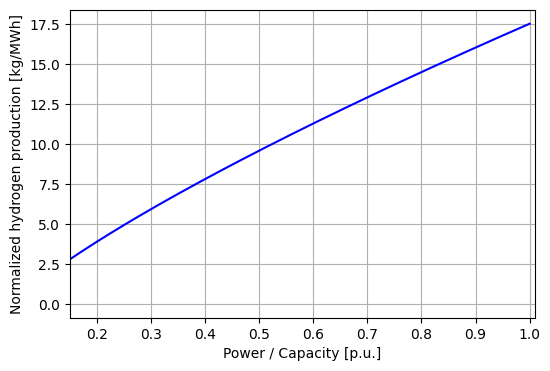

Segment 0: Interval [0.1500, 0.1750], A = 22.42298, B = -0.57430
Segment 1: Interval [0.1750, 0.2000], A = 21.73894, B = -0.45459
Segment 2: Interval [0.2000, 0.2500], A = 20.85739, B = -0.27828
Segment 3: Interval [0.2500, 0.3000], A = 19.90378, B = -0.03988
Segment 4: Interval [0.3000, 0.3500], A = 19.15124, B = 0.18588
Segment 5: Interval [0.3500, 0.4000], A = 18.53714, B = 0.40082
Segment 6: Interval [0.4000, 0.5000], A = 17.79792, B = 0.69650
Segment 7: Interval [0.5000, 0.6000], A = 17.00733, B = 1.09180
Segment 8: Interval [0.6000, 0.7000], A = 16.36844, B = 1.47513
Segment 9: Interval [0.7000, 0.8000], A = 15.82958, B = 1.85234
Segment 10: Interval [0.8000, 0.9000], A = 15.36189, B = 2.22648
Segment 11: Interval [0.9000, 1.0000], A = 14.94780, B = 2.59917


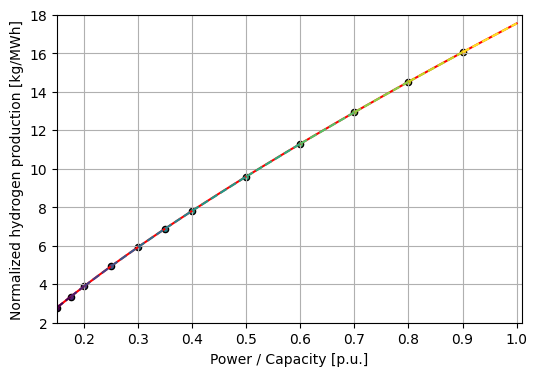

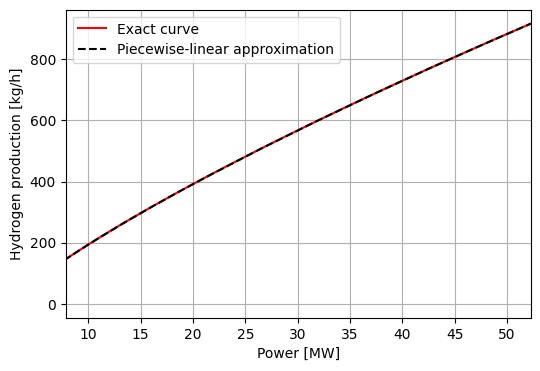

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters (same as before)
a1, a2, a3, a4 = 1.5184, 1.5421E-03, 9.523E-05, 9.84E-08
r1, r2 = 4.45153E-05, 6.88874E-09
d1, d2 = -3.12996E-06, 4.47137E-07
s, t1, t2, t3 = 0.33824, -0.01539, 2.00181, 15.24178
f11, f12, f21, f22 = 478645.74, -2953.15, 1.0396, -0.00104
F_const = 96485.3321
M_H2 = 2.0159
HHV = 39.41
T_cell = 90
p_cell = 30
A_cell = 0.2
C_E = 104.5 / 2
i_max = 5000

# Current density vector (avoid zero to prevent log issues)
i = np.linspace(1, i_max, 500)

# Functions from the model
def U_rev(T):
    T_K = T + 273.15
    return a1 - a2 * T_K + a3 * T_K * np.log(T_K) + a4 * T_K**2

def U_cell(T, p, i):
    return U_rev(T) + ((r1 + d1) + r2 * T + d2 * p) * i + s * np.log10((t1 + t2 / T + t3 / T**2) * i + 1)

def P_cell(T, p, i):
    return i * U_cell(T, p, i)

def eta_F(T, i):
    return (i**2 / (f11 + f12 * T + i**2)) * (f21 + f22 * T)

def H2_production(T, i, A, n_c):
    return (eta_F(T, i) * n_c * M_H2 * i * A) / (2 * F_const) * 3.6  # kg/h

def eta_kg_per_MWh(T, i, A, n_c):
    P_elec = P_cell(T, p_cell, i) * A * n_c / 1e6  # MW
    return H2_production(T, i, A, n_c) / P_elec  # kg/MWh

def n_cell(i_max, A_cell, C_E, T, p):
    I_max_cell = i_max * A_cell
    U_max_cell = U_cell(T, p, i_max)
    P_max_cell = I_max_cell * U_max_cell
    return (C_E * 1e6) / P_max_cell

# Generate the master curve from the cell-level model:
n_c = n_cell(i_max, A_cell, C_E, T_cell, p_cell)
P_elec = P_cell(T_cell, p_cell, i) * A_cell * n_c / 1e6  # MW (master curve)
H2_prod = H2_production(T_cell, i, A_cell, n_c)            # kg/h
efficiency = eta_kg_per_MWh(T_cell, i, A_cell, n_c)         # kg/MWh

# Remove any potential NaNs/infs
efficiency = np.nan_to_num(efficiency, nan=0, posinf=0, neginf=0)

# Create the master (dimensionless) curve for h(x) = x * f(x)
P_max_model = np.max(P_elec)
x_master = P_elec / P_max_model  # normalized power, x in [0, 1]
h_master = x_master * efficiency  # h(x) = x * f(x)

# Plot the master h(x) curve
plt.figure(figsize=(6, 4))
plt.plot(x_master, h_master, color='b')
plt.xlim(0.15, 1.01)
plt.xlabel("Power / Capacity [p.u.]")
plt.ylabel("Normalized hydrogen production [kg/MWh]")
plt.grid()
plt.show()

# -----------------------------------------------------------------------------
# Approximate h(x) piecewise linearly using linear functions.
# x_breakpoints = [0.15, 0.2, 0.3, 0.5, 0.8,  1.0]
x_breakpoints = [0.15, 0.175, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
h_breakpoints = np.interp(x_breakpoints, x_master, h_master)
num_segments = len(x_breakpoints) - 1
A_segments = []
B_segments = []
for j in range(num_segments):
    x0, x1 = x_breakpoints[j], x_breakpoints[j+1]
    h0, h1 = h_breakpoints[j], h_breakpoints[j+1]
    A = (h1 - h0) / (x1 - x0)
    B = h0 - A * x0
    A_segments.append(A)
    B_segments.append(B)
    print(f"Segment {j}: Interval [{x0:.4f}, {x1:.4f}], A = {A:.5f}, B = {B:.5f}")

# Plot each piecewise linear segment in a different color.
plt.figure(figsize=(6, 4))
# Define a colormap
colors = plt.cm.viridis(np.linspace(0, 1, num_segments))
plt.plot(x_master, h_master, label='Exact curve', color='r')
for j in range(num_segments):
    # Generate a set of x values for this segment
    x_seg = np.linspace(x_breakpoints[j], x_breakpoints[j+1], 50)
    h_seg = A_segments[j] * x_seg + B_segments[j]
    plt.plot(x_seg, h_seg, label=f'Segment {j+1}', color=colors[j], linestyle='--')
    plt.scatter(x_breakpoints[j], h_breakpoints[j], color=colors[j], edgecolor='black', s=20)  # Mark segment start points with smaller size
plt.xlabel("Power / Capacity [p.u.]")
plt.ylabel("Normalized hydrogen production [kg/MWh]")
plt.xlim(0.15, 1.01)
plt.ylim(2, 18)
# plt.legend(ncol=3, loc='lower left')
plt.grid()
plt.savefig('Normalized_hydrogen_production_linearization.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()

# -----------------------------------------------------------------------------
# Given an operating point (P, Pmax), approximate g(P, Pmax) as:
#   1. Compute x = P/Pmax.
#   2. Find the segment.
#   3. h(x) ≈ A_i * x + B_i, and then
#      g(P, Pmax) ≈ Pmax * h(x) = A_i * P + B_i * Pmax.
P_max_actual = P_max_model  # Example: actual Pmax 20% higher than model
P_values = np.linspace(0, P_max_actual, 200)

def approx_g(P, P_max, x_breakpoints, A_segs, B_segs):
    x = P / P_max
    if x >= 1.0:
        seg = len(x_breakpoints) - 2
    else:
        seg = np.searchsorted(x_breakpoints, x, side='right') - 1
    h_approx = A_segs[seg] * x + B_segs[seg]
    return P_max * h_approx

g_approx = np.array([approx_g(P, P_max_actual, x_breakpoints, A_segments, B_segments)
                     for P in P_values])

# For comparison, compute "exact" g from the master efficiency curve.
efficiency_actual = np.interp(P_values / P_max_actual, x_master, efficiency)
g_exact = P_values * efficiency_actual

plt.figure(figsize=(6, 4))
plt.plot(P_values, g_exact, label='Exact curve', color='r')
plt.plot(P_values, g_approx, '--', label='Piecewise-linear approximation', color='k')
plt.xlabel('Power [MW]')
plt.ylabel('Hydrogen production [kg/h]')
plt.xlim(0.15 * P_max_actual,P_max_actual)
plt.legend()
plt.grid()
plt.show()


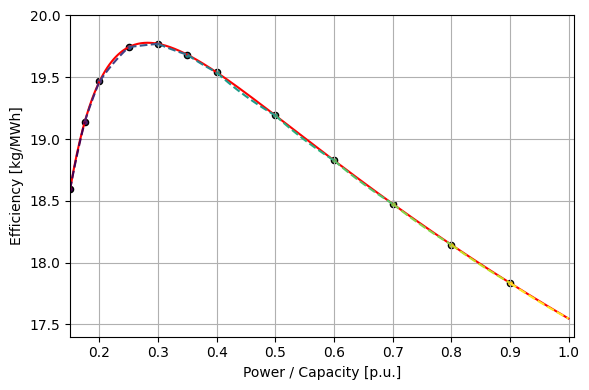

In [8]:
# ---------------------------------------------------------------------------
# Plot efficiency f(x) = h(x)/x and its approximation f_j(x) = A_j + B_j/x
f_exact = efficiency  # already computed earlier: f(x) = h(x)/x

plt.figure(figsize=(6, 4))
plt.plot(x_master, f_exact, label='Real curve', color='r')

# Plot each piecewise approximation of f(x)
for j in range(num_segments):
    x0, x1 = x_breakpoints[j], x_breakpoints[j+1]
    x_seg = np.linspace(x0, x1, 100)
    f_seg = A_segments[j] + B_segments[j] / x_seg
    plt.plot(x_seg, f_seg, linestyle='--', label=f'Curve {j+1}', color=colors[j])
    plt.scatter(x0, A_segments[j] + B_segments[j] / x0, color=colors[j], edgecolor='black', s=20)

plt.xlabel("Power / Capacity [p.u.]")
plt.ylabel("Efficiency [kg/MWh]")
plt.xlim(0.15, 1.01)
plt.ylim(17.4,20)
# plt.legend(ncol=3, loc='lower left')
plt.grid()
plt.tight_layout()
plt.savefig('Efficiency_linearization.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()


In [39]:
import pandas as pd
df1 = pd.read_csv('Operation_5.csv',sep=';')
df1

,h,PEL_subproblem_main,mHydr_direct_subproblem_main,mHydr_sell_subproblem_main,mHST_in_subproblem_main,mHST_out_subproblem_main,mHST_subproblem_main,EBESS_subproblem_main,PBESSc_subproblem_main,PBESSd_subproblem_main,Ppurch_subproblem_main,Psell_subproblem_main,PPV_subproblem_main,PWT_subproblem_main
0,1.0,24.9500,500.0000,500.0,0.0,0.0000,0.0,0.0,0.0,0.0,4.9654,0.0000,0.0,19.9846
1,2.0,24.9500,500.0000,500.0,0.0,0.0000,0.0,0.0,0.0,0.0,2.4084,0.0000,0.0,22.5416
2,3.0,24.9500,500.0000,500.0,0.0,0.0000,0.0,0.0,0.0,0.0,1.6073,0.0000,0.0,23.3427
3,4.0,24.9500,500.0000,500.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.7409,0.0000,0.0,24.2091
4,5.0,24.9500,500.0000,500.0,0.0,0.0000,0.0,0.0,0.0,0.0,1.7152,0.0000,0.0,23.2348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8756.0,17.2883,346.4584,500.0,0.0,153.5416,0.0,0.0,0.0,0.0,1.0799,0.0000,0.0,16.2083
8756,8757.0,24.9500,500.0000,500.0,0.0,0.0000,0.0,0.0,0.0,0.0,4.0417,0.0000,0.0,20.9083
8757,8758.0,24.9500,500.0000,500.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,2.1240,0.0,27.0740
8758,8759.0,24.9500,500.0000,500.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,1.5794,0.0,26.5294


In [40]:
df1['Ppurch_subproblem_main'].sum()
df1['Psell_subproblem_main'].sum()
dft = [df1['Ppurch_subproblem_main'].sum()]
dft.append(df1['Psell_subproblem_main'].sum())
dft

[np.float64(21999.4795), np.float64(34363.263699999996)]

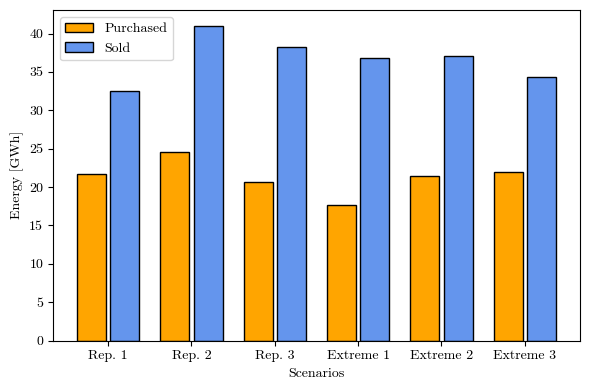

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', family='serif', serif='cmr10', size=10)
plt.rcParams['axes.unicode_minus'] = False

import matplotlib.pyplot as plt
import numpy as np

# Data preparation
initial_probabilities = {
    'Rep. 1': {'Typical': 21649.2644, 'Extreme': 17695.9167},
    'Rep. 2': {'Typical': 24560.115400000002, 'Extreme': 21384.6455},
    'Rep. 3': {'Typical': 20611.0133, 'Extreme': 21999.4795},
}

final_probabilities = {
    'Extreme 1': {'Typical': 32489.3637, 'Extreme': 36800.0155},
    'Extreme 2': {'Typical': 41016.189999999995, 'Extreme': 37067.763199999994},
    'Extreme 3': {'Typical': 38281.877199999995, 'Extreme': 34363.263699999996},
}

# Set up the bar chart
bar_width = 0.35
x = np.arange(len(initial_probabilities) * 2)  # the label locations

# Create a new figure
fig, ax = plt.subplots(figsize=(6, 4))

# Plotting initial probabilities with appropriate labels for legend
for i, (cluster, probs) in enumerate(initial_probabilities.items()):
    ax.bar(x[i] - 0.2, probs['Typical']/1000, bar_width, color='orange', edgecolor='black', label='Purchased' if i == 0 else "")
    ax.bar(x[i + 3] - 0.2, probs['Extreme']/1000, bar_width, color='orange', edgecolor='black')

# Plotting final probabilities with appropriate labels for legend
for i, (cluster, probs) in enumerate(final_probabilities.items()):
    ax.bar(x[i] + 0.2, probs['Typical']/1000, bar_width, color='Cornflowerblue', edgecolor='black', label='Sold' if i == 0 else "")
    ax.bar(x[i + 3] + 0.2, probs['Extreme']/1000, bar_width, color='Cornflowerblue', edgecolor='black')

# Adding labels and title
ax.set_xlabel('Scenarios',fontsize=10)
ax.set_ylabel('Energy [GWh]',fontsize=10)
ax.set_xticks(x)
ax.set_xticklabels([f'{cluster}' for cluster in initial_probabilities] + [f'{cluster}' for cluster in final_probabilities],fontsize=10)

# Custom legend with distinct colors and labels
ax.legend(loc='best',fontsize=10)

# Show the plot
plt.tight_layout()
plt.savefig('Substation_Exchanges.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()

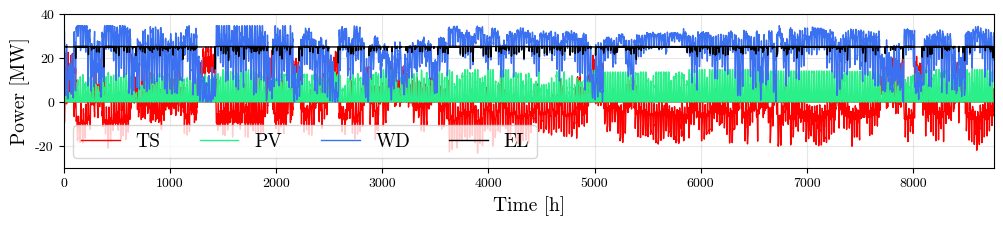

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

mpl.rc('font', family='serif', serif='cmr10', size=10)
plt.rcParams['axes.unicode_minus'] = False

# Assuming df1 is already defined with the necessary columns
PEL_0 = list(df1['PEL_subproblem_main'].values)
Ppurch_0 = list(df1['Ppurch_subproblem_main'].values)
Psell_0 = list(df1['Psell_subproblem_main'].values)
PPV_0 = list(df1[' PPV_subproblem_main'].values)
PWT_0 = list(df1[' PWT_subproblem_main '].values)

# Main plot
fig, ax_main = plt.subplots(figsize=(12, 2))

ax_main.plot(Ppurch_0, linewidth=1, color='r', label=r'TS')
ax_main.plot(-1*np.array(Psell_0), linewidth=1.0, color='r')
ax_main.plot(PPV_0, linewidth=1, color='#2bf08a', label=r'PV')
ax_main.plot(PWT_0, linewidth=1, color='#3b71f1', label=r'WD')
ax_main.plot(PEL_0, linewidth=1, color='k', label=r'EL')

ax_main.set_xlabel(r'Time [h]', fontsize=14)
ax_main.set_ylabel(r'Power [MW]', fontsize=14)
ax_main.set_xlim(0, 8760)
ax_main.set_ylim(-30, 40)
ax_main.legend(ncol=5, loc='lower left', fontsize=14)
ax_main.grid(True, alpha=0.3)

plt.savefig('Balance_P_Scenario_2.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()


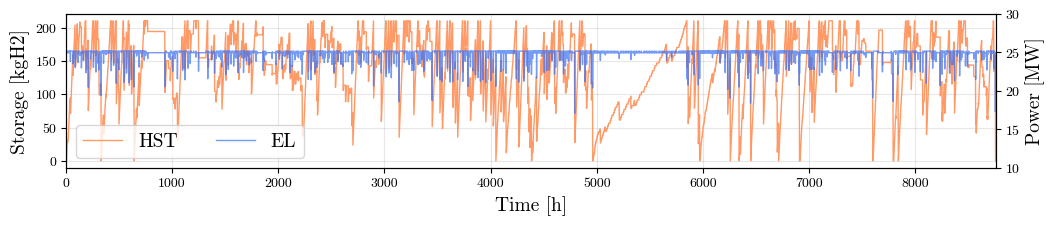

In [47]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rc('font', family='serif', serif='cmr10', size=10)
plt.rcParams['axes.unicode_minus'] = False

# Assuming df1 is already defined with the necessary columns
PEL_0 = list(df1['PEL_subproblem_main'].values)
mHST_0 = list(df1['mHST_subproblem_main'].values)

# Main plot
fig, ax_main = plt.subplots(figsize=(12, 2))

# Plot the first curve (mHST_0) on the left axis
line1, = ax_main.plot(mHST_0, linewidth=1, color='#ff9966', label=r'HST')

# Create a twin axis to plot the second curve (PEL_0)
ax_secondary = ax_main.twinx()
line2, = ax_secondary.plot(PEL_0, linewidth=1, color='#3b71f1', label=r'EL', alpha = 0.7)

# Set labels and limits
ax_main.set_xlabel(r'Time [h]', fontsize=14)
ax_main.set_ylabel(r'Storage [kgH2]', fontsize=14)
ax_main.set_xlim(0, 8760)
ax_main.grid(True, alpha=0.3)

# Adjust secondary axis label
ax_secondary.set_ylabel(r'Power [MW]', fontsize=14)
ax_secondary.set_ylim(10, 30)  

# Combine legends from both axes
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax_main.legend(lines, labels, loc='lower left', ncol=2, fontsize=14)

plt.savefig('Balance_HST_Scenario_5.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()



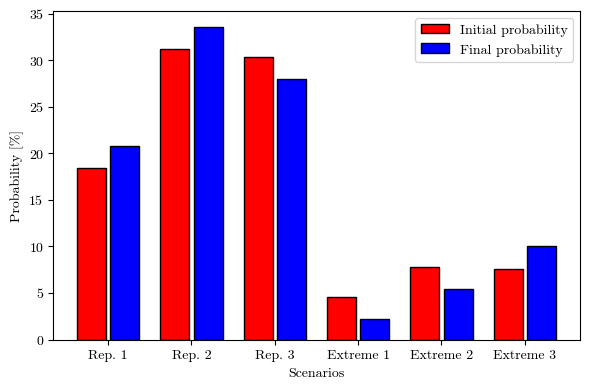

In [59]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', family='serif', serif='cmr10', size=10)
plt.rcParams['axes.unicode_minus'] = False

import matplotlib.pyplot as plt
import numpy as np

# Data preparation
initial_probabilities = {
    'Rep. 1': {'Typical': 18.4, 'Extreme': 4.6},
    'Rep. 2': {'Typical': 31.2, 'Extreme': 7.8},
    'Rep. 3': {'Typical': 30.4, 'Extreme': 7.6},
}

final_probabilities = {
    'Extreme 1': {'Typical': 20.7937, 'Extreme': 2.20625},
    'Extreme 2': {'Typical': 33.5937, 'Extreme': 5.40625},
    'Extreme 3': {'Typical': 28.0063, 'Extreme': 9.99375},
}

# Set up the bar chart
bar_width = 0.35
x = np.arange(len(initial_probabilities) * 2)  # the label locations

# Create a new figure
fig, ax = plt.subplots(figsize=(6, 4))

# Plotting initial probabilities with appropriate labels for legend
for i, (cluster, probs) in enumerate(initial_probabilities.items()):
    ax.bar(x[i] - 0.2, probs['Typical'], bar_width, color='red', edgecolor='black', label='Initial probability' if i == 0 else "")
    ax.bar(x[i + 3] - 0.2, probs['Extreme'], bar_width, color='red', edgecolor='black')

# Plotting final probabilities with appropriate labels for legend
for i, (cluster, probs) in enumerate(final_probabilities.items()):
    ax.bar(x[i] + 0.2, probs['Typical'], bar_width, color='blue', edgecolor='black', label='Final probability' if i == 0 else "")
    ax.bar(x[i + 3] + 0.2, probs['Extreme'], bar_width, color='blue', edgecolor='black')

# Adding labels and title
ax.set_xlabel('Scenarios',fontsize=10)
ax.set_ylabel('Probability [%]',fontsize=10)
ax.set_xticks(x)
ax.set_xticklabels([f'{cluster}' for cluster in initial_probabilities] + [f'{cluster}' for cluster in final_probabilities],fontsize=10)

# Custom legend with distinct colors and labels
ax.legend(loc='best',fontsize=10)

# Show the plot
plt.tight_layout()
plt.savefig('Probabilities.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()



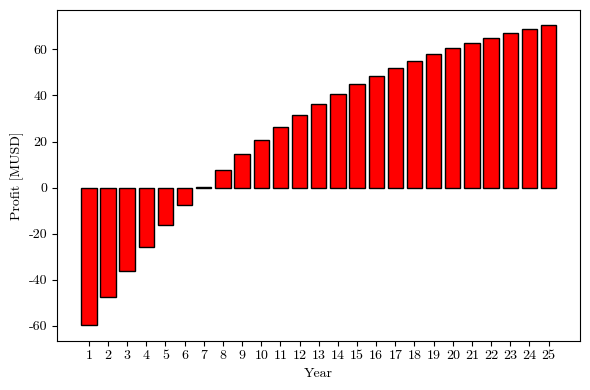

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the image
data = [
    -59.80622936, -47.483504, -36.17825137, -25.80645998, -16.29105502, -7.56132571, 
    0.4476002658, 7.795238776, 14.53619154, 20.72055187, 26.39427694, 31.59952931, 
    36.37499019, 40.75614696, 44.77555685, 48.46308885, 51.84614573, 54.94986765, 
    57.79731894, 60.40965958, 62.80630237, 65.00505722, 67.0222635, 68.87291147, 
    70.57075364
]

# Generate x-axis labels (1 to 25)
x_labels = list(range(1, 26))

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(x_labels, data, edgecolor='black', color='red')

# Add labels and title
plt.xlabel('Year', fontsize=10)
plt.xticks(x_labels)
plt.ylabel('Profit [MUSD]', fontsize=10)

# Show the plot
plt.tight_layout()
plt.savefig('Net_Cash_Flow.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()

